In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

# Load Data

In [2]:
df = pd.read_csv("data/diamonds_train.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


## Features y Labels
Separo los datos en:
- features: los datos que usaremos para predecir el precio.
- label: el precio, el objetivo a predecir.

In [3]:
features_cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']
label_cols = 'price'

X = df[features_cols]
y = df[label_cols]

print(X.shape)
print(y.shape)

(40455, 9)
(40455,)


## Numerical Features vs Categorical Features
Las *features* se dividen en:
- Numéricas: aquellas que contienen números.
- Categóricas: aquellas que contienen texto.

Los datos *categóricos* hay que convertirlos en datos numéricos para que los modelos de *machine learning* puedan  trabajar con ellos. Utilizo *one-hot-encoding* para hacer esto.

In [4]:
numerical_features = ['carat', 'depth', 'table', 'x', 'y','z']
categorical_features = ['cut', 'color', 'clarity']

In [5]:
# Transformar categóricos usando One Hot Encoding usando get_dummies()
#X_categorical = pd.get_dummies(X[categorical_features])
#X_categorical.shape

In [6]:
# Transformar datos categóricos con Label Encoder
encoder = LabelEncoder()

X_categorical = X[categorical_features].apply(encoder.fit_transform)

X_categorical.shape

(40455, 3)

In [7]:
X = pd.concat([X[numerical_features], X_categorical], axis=1)
X.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,1.21,62.4,58.0,6.83,6.79,4.25,3,6,5
1,0.32,63.0,57.0,4.35,4.38,2.75,4,4,5
2,0.71,65.5,55.0,5.62,5.53,3.65,0,3,4
3,0.41,63.8,56.0,4.68,4.72,3.00,1,0,2
4,1.02,60.5,59.0,6.55,6.51,3.95,2,3,2


# Feature Selection
Ya tenemos todas las columnas limpias (sin nulos) y pasadas a numéricas (one-hot encoding).

## Pearson's r
AKA Standard Correlation Coefficient.

**Nota** este proceso es fácil de hacer porque el dataset no es demasiado grande.

In [8]:
diamonds_df = pd.concat([X, y], axis=1)
diamonds_df.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
0,1.21,62.4,58.0,6.83,6.79,4.25,3,6,5,4268
1,0.32,63.0,57.0,4.35,4.38,2.75,4,4,5,505
2,0.71,65.5,55.0,5.62,5.53,3.65,0,3,4,2686
3,0.41,63.8,56.0,4.68,4.72,3.00,1,0,2,738
4,1.02,60.5,59.0,6.55,6.51,3.95,2,3,2,4882


In [9]:
corr_matrix = diamonds_df.corr()

corr_matrix['price'].sort_values(ascending=False)

price      1.000000
carat      0.921935
x          0.885848
z          0.874500
y          0.866163
color      0.174855
table      0.130111
cut        0.044885
depth     -0.014864
clarity   -0.074228
Name: price, dtype: float64

El coeficiente de correlación va de -1 a 1. Los coeficientes cercanos a 1 representan fuerte correlación positiva. Los cercanos a -1 fuerte correlación negativa. Los coeficientes cercanos a 0 representan que no hay una **correlación linear**.

Importante tener en cuenta que este coeficiente mide **correlación linear** y puede ignorar completamente otro tipo de correlación.

## Scatter Matrix
Vemos la correlación de atributos de forma visual pero limitado ya que hay un montón de columnas.

La verdad es que no creo que aporte gran cosa, especialmente porque si pongo las 10 columnas tarda mucho en pintar los gráficos y no se ve nada.

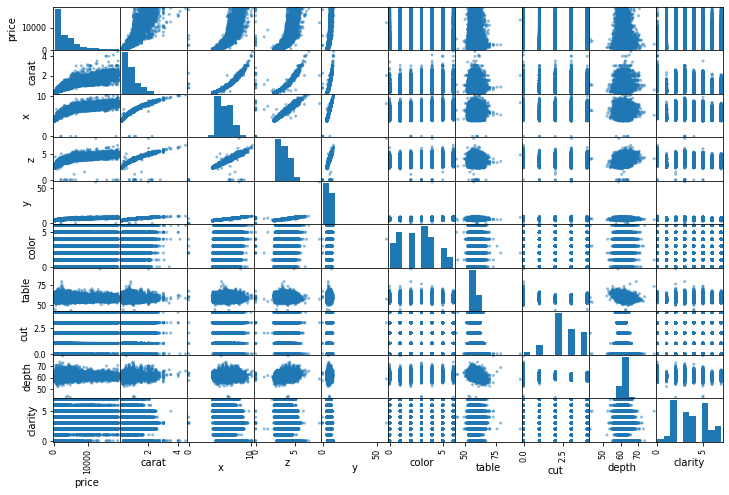

In [10]:
from pandas.plotting import scatter_matrix

columns = corr_matrix['price'].sort_values(ascending=False).index.to_list()
scatter_matrix(diamonds_df[columns], figsize=(12, 8));

## Combinando atributos

In [10]:
corr_matrix = diamonds_df.corr()

corr_matrix['price'].sort_values(ascending=False)

price      1.000000
carat      0.921935
x          0.885848
z          0.874500
y          0.866163
color      0.174855
table      0.130111
cut        0.044885
depth     -0.014864
clarity   -0.074228
Name: price, dtype: float64

In [11]:
df_combi_labels = diamonds_df

df_combi_labels["carat_depth"] = df_combi_labels["carat"] + df_combi_labels["depth"]
df_combi_labels["carat_clarity"] = df_combi_labels["carat"] + df_combi_labels["clarity"]
df_combi_labels["carat_cut"] = df_combi_labels["carat"] + df_combi_labels["cut"]
df_combi_labels["carat_color"] = df_combi_labels["carat"] + df_combi_labels["color"]
df_combi_labels["carat_table"] = df_combi_labels["carat"] + df_combi_labels["table"]



In [12]:
corr_matrix = df_combi_labels.corr()

corr_matrix['price'].sort_values(ascending=False)

price            1.000000
carat            0.921935
x                0.885848
z                0.874500
y                0.866163
carat_cut        0.424152
carat_color      0.388056
carat_table      0.307949
carat_depth      0.274333
carat_clarity    0.184045
color            0.174855
table            0.130111
cut              0.044885
depth           -0.014864
clarity         -0.074228
Name: price, dtype: float64

Vemos que las combinaciones:
- carats + depth: correlaciona con price mucho más que la feature 'depth' a secas.
- carats + clarity: correlaciona más que 'clarity' a secas.
- carats + cut: correlaciona mucho más que 'cut' a secas.
- carats + color: correlaciona mucho más que 'color' a secas.
- carats + table: correlaciona mucho más que 'table' a secas.


In [13]:
#columns_to_drop = ['depth', 'clarity', 'cut', 'color', 'table']
#columns_to_drop = ['x', 'y', 'z', 'depth', 'clarity', 'cut', 'color', 'table']
#df_combi_labels = df_combi_labels.drop(columns_to_drop, axis=1)

In [35]:
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_combi_labels.drop('price', axis=1)
y = df_combi_labels['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

model = LGBMRegressor(n_estimators=512, num_leaves=64, boosting_type='dart')
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_predict = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(rmse)

537.9163093970993


In [16]:
# Como puedes ver da un RMSE bastante bueno: 528. (No sé si sera overfiting porque es muy buena).

# Preparo el envio para el concurso:
import p_reporting.m_submission as submit

test_df = pd.read_csv('data/diamonds_test.csv')

numerical_features = ['carat', 'depth', 'table', 'x', 'y','z']
categorical_features = ['cut', 'color', 'clarity']

encoder = LabelEncoder()
X_categorical = test_df[categorical_features].apply(encoder.fit_transform)
X_test = pd.concat([test_df[numerical_features], X_categorical], axis=1)

X_test["carat_depth"] = X_test["carat"] + X_test["depth"]
X_test["carat_clarity"] = X_test["carat"] + X_test["clarity"]
X_test["carat_cut"] = X_test["carat"] + X_test["cut"]
X_test["carat_color"] = X_test["carat"] + X_test["color"]
X_test["carat_table"] = X_test["carat"] + X_test["table"]

#X_test = X_test.drop(columns_to_drop, axis=1)

X_test_scaled = scaler.transform(X_test)

y_predict = model.predict(X_test_scaled)

submit.to_csv(submit.to_df(test_df, y_predict))
print("Guardado!!!")

Guardado!!!


El resultado en la competición es un poco mediocre. No consigo superar mi mejor submit por poco.

**Pero** es bastante muy teniendo en cuenta que no aplico ninguna optimización de hiperparámetros. Tengo que trasladar este proceso de selección de features al notebook principal para  ver si combinándolo con la selección de hiperparámetros sale un resultado mejor. 